In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from imports import *

In [27]:
# prebuilt model classes
import importlib

from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *
from sim import multi_sim_run
from sim import plot

import time
import os

### Run simulations for a range of resolutions and random seeds 

#### Conn-Conn runs

In [28]:
resolutions = [1.00, 1.01, 1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [0, 1, 2, 3, 4, 5, 6] # [0, 1, 2, 3, 4, 5, 6]

resolutions = [1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [1] # [0, 1, 2, 3, 4, 5, 6]

results = {}
for rv in resolutions:
    for seed in seeds:
        try:
            print(f"Running simulation with resolution {rv}")
            start_time = time.time()
            conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
                'conn only',
                'community',
                'xgboost',
                use_gpu=True,
                use_shared_regions=False, 
                test_shared_regions=False,
                save_sim=True,
                resolution=rv,
                random_seed=seed,
                search_method='random',
            )
            end_time = time.time()
            print(f"Simulation took {end_time - start_time} seconds to execute...")
            
            results[rv] = conn_xgb_community_noshared_sim_results
        except Exception as e:
            print(e)
            continue


Running simulation with resolution 1.02

 Test fold num: 1
(8930, 190) (8930,) (342, 190) (342,)
2
3
4
Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.115 total time=   0.2s
[CV 1/1] END colsample_bytree=0.8, device=cuda, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=-0.212 total time=   0.1s
[CV 1/1] END colsample_bytree=0.5, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, random_state=42, reg_alpha=1, reg_lambda=0.1, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.204 total time=   0.2s
[CV 1/1] END colsample_bytree=0.5, device=cuda, gamma=0.1, le

### TRACK CONFIG SIM RUNS FOR RESOLUTION=1.0 (h100 tests)
random search: 
- niter=100: 157 secs
- niter=100, njobs=4: 156 secs

n_iters=100, n_points=1, n_jobs=1, 'gpu_hist': 868 secs, 15 mins
n_iters=10, n_points=10, n_jobs=1, 'gpu_hist': 23 secs (_this might be what we want_)
n_iters=10, n_points=10, n_jobs=-1, 'gpu_hist': 40 secs (may be getting passed to cpu with n jobs)
n_iters=10, n_points=10, n_jobs=1, 'hist':  23 secs (hist seems to take the same at this level)
n_iters=10, n_points=1, n_jobs=1, 'gpu_hist': 33 secs

n_iters=50, n_points=1, n_jobs=1, 'gpu_hist': ~440 secs, 7 mins
n_iters=10, n_points=5, n_jobs=1, 'gpu_hist': 37 secs
n_iters=1, n_points=50, n_jobs=1, 'gpu_hist':  7 secs


- figure out if gpu_hist or hist is faster... (gpu_hist may be faster for gene expression but hist faster for connectome - size of dataset matters, need to test this)

#### Trans-Conn runs

In [ ]:
resolutions = [1.01, 1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [1, 3] # [0, 1, 2, 3, 4, 5, 6]

results = {}
for rv in resolutions:
    for seed in seeds:
        try:
            print(f"Running simulation with resolution {rv}")
            start_time = time.time()
            conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
                'trans only',
                'community',
                'xgboost',
                use_gpu=True,
                use_shared_regions=False, 
                test_shared_regions=False,
                save_sim=True,
                resolution=rv,
                random_seed=seed,
                search_method='bayes',
            )
            end_time = time.time()
            print(f"Simulation took {end_time - start_time} seconds to execute...")
            
            results[rv] = conn_xgb_community_noshared_sim_results
        except Exception as e:
            print(e)
            continue


Running simulation with resolution 1.01
Processing fold 0...


### Compare results

In [30]:
resolutions = [1.00, 1.005, 1.01, 1.02]
seeds = [0, 1, 2, 3, 4, 5, 6]


In [31]:
conn_loaded_results = {}

for r in resolutions:
    for s in seeds:
        try:
            dataset = f"single_sim_conn_community_xgboost{r}_{s}.pickle"
            print(dataset)
            conn_loaded_results[str(r)+'_'+str(s)] = multi_sim_run.open_pickled_results(dataset)
        except:
            continue

filtered_results = []
for r, v in conn_loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "mse": v[0][0]['test_metrics']['mse'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

conn_df = pd.DataFrame.from_dict(filtered_results)
conn_df

single_sim_conn_community_xgboost1.0_0.pickle
single_sim_conn_community_xgboost1.0_1.pickle
single_sim_conn_community_xgboost1.0_2.pickle
single_sim_conn_community_xgboost1.0_3.pickle
single_sim_conn_community_xgboost1.0_4.pickle
single_sim_conn_community_xgboost1.0_5.pickle
single_sim_conn_community_xgboost1.0_6.pickle
single_sim_conn_community_xgboost1.005_0.pickle
single_sim_conn_community_xgboost1.005_1.pickle
single_sim_conn_community_xgboost1.005_2.pickle
single_sim_conn_community_xgboost1.005_3.pickle
single_sim_conn_community_xgboost1.005_4.pickle
single_sim_conn_community_xgboost1.005_5.pickle
single_sim_conn_community_xgboost1.005_6.pickle
single_sim_conn_community_xgboost1.01_0.pickle
single_sim_conn_community_xgboost1.01_1.pickle
single_sim_conn_community_xgboost1.01_2.pickle
single_sim_conn_community_xgboost1.01_3.pickle
single_sim_conn_community_xgboost1.01_4.pickle
single_sim_conn_community_xgboost1.01_5.pickle
single_sim_conn_community_xgboost1.01_6.pickle
single_sim_co

,resolution,pearson_corr,mse,r2
0,1.0_0,0.747326,0.096125,-0.544386
1,1.0_1,0.722763,0.062360,-0.395843
2,1.0_2,0.742952,0.089892,-0.433246
3,1.0_3,0.824104,0.106161,-0.430413
4,1.0_4,0.746466,0.091659,-0.472334
5,1.0_5,0.747447,0.049699,-0.086500
6,1.0_6,0.746466,0.091659,-0.472334
7,1.005_5,0.747447,0.049699,-0.086500
8,1.01_0,0.747326,0.096125,-0.544386
9,1.01_1,0.722763,0.062360,-0.395843


In [32]:
trans_loaded_results = {}

for r in resolutions:
    for s in seeds:
        try:
            dataset = f"single_sim_trans_community_xgboost{r}_{s}.pickle"
            print(dataset)
            trans_loaded_results[str(r)+'_'+str(s)] = multi_sim_run.open_pickled_results(dataset)
        except:
            continue

filtered_results = []
for r, v in trans_loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "mse": v[0][0]['test_metrics']['mse'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

trans_df = pd.DataFrame.from_dict(filtered_results)
trans_df

single_sim_trans_community_xgboost1.0_0.pickle
single_sim_trans_community_xgboost1.0_1.pickle
single_sim_trans_community_xgboost1.0_2.pickle
single_sim_trans_community_xgboost1.0_3.pickle
single_sim_trans_community_xgboost1.0_4.pickle
single_sim_trans_community_xgboost1.0_5.pickle
single_sim_trans_community_xgboost1.0_6.pickle
single_sim_trans_community_xgboost1.005_0.pickle
single_sim_trans_community_xgboost1.005_1.pickle
single_sim_trans_community_xgboost1.005_2.pickle
single_sim_trans_community_xgboost1.005_3.pickle
single_sim_trans_community_xgboost1.005_4.pickle
single_sim_trans_community_xgboost1.005_5.pickle
single_sim_trans_community_xgboost1.005_6.pickle
single_sim_trans_community_xgboost1.01_0.pickle
single_sim_trans_community_xgboost1.01_1.pickle
single_sim_trans_community_xgboost1.01_2.pickle
single_sim_trans_community_xgboost1.01_3.pickle
single_sim_trans_community_xgboost1.01_4.pickle
single_sim_trans_community_xgboost1.01_5.pickle
single_sim_trans_community_xgboost1.01_6

,resolution,pearson_corr,mse,r2
0,1.01_1,0.544332,0.085693,-2.069636
1,1.01_2,0.555025,0.178306,-1.882611
2,1.01_3,0.603714,0.051171,-0.485462
3,1.02_1,0.857915,0.043939,-0.258901
4,1.02_2,0.555025,0.178306,-1.882611
5,1.02_3,0.603714,0.051171,-0.485462


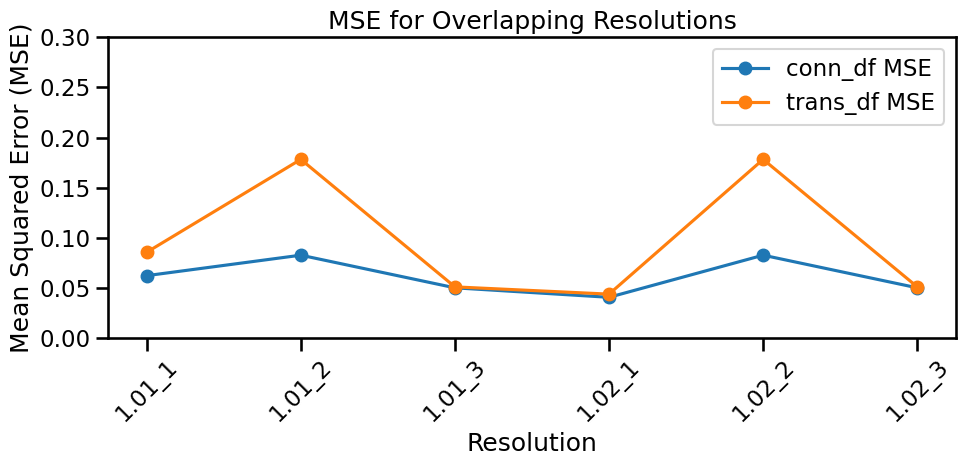

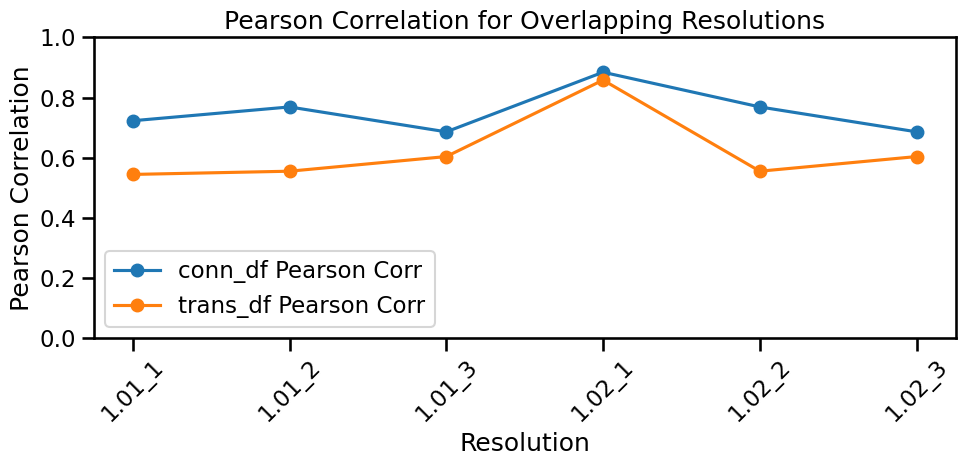

In [33]:

# Merge on 'resolution' to find overlapping resolution keys
merged_df = pd.merge(conn_df, trans_df, on='resolution', suffixes=('_conn', '_trans'))

# Plot 1: Mean Squared Error (MSE) for overlapping resolution values
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['mse_conn'], label='conn_df MSE', marker='o')
plt.plot(merged_df['resolution'], merged_df['mse_trans'], label='trans_df MSE', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, 0.3)
plt.title('MSE for Overlapping Resolutions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Pearson Correlation for overlapping resolution values
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['pearson_corr_conn'], label='conn_df Pearson Corr', marker='o')
plt.plot(merged_df['resolution'], merged_df['pearson_corr_trans'], label='trans_df Pearson Corr', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Pearson Correlation')
plt.ylim(0, 1.0)
plt.title('Pearson Correlation for Overlapping Resolutions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Visualize specific runs

CONN


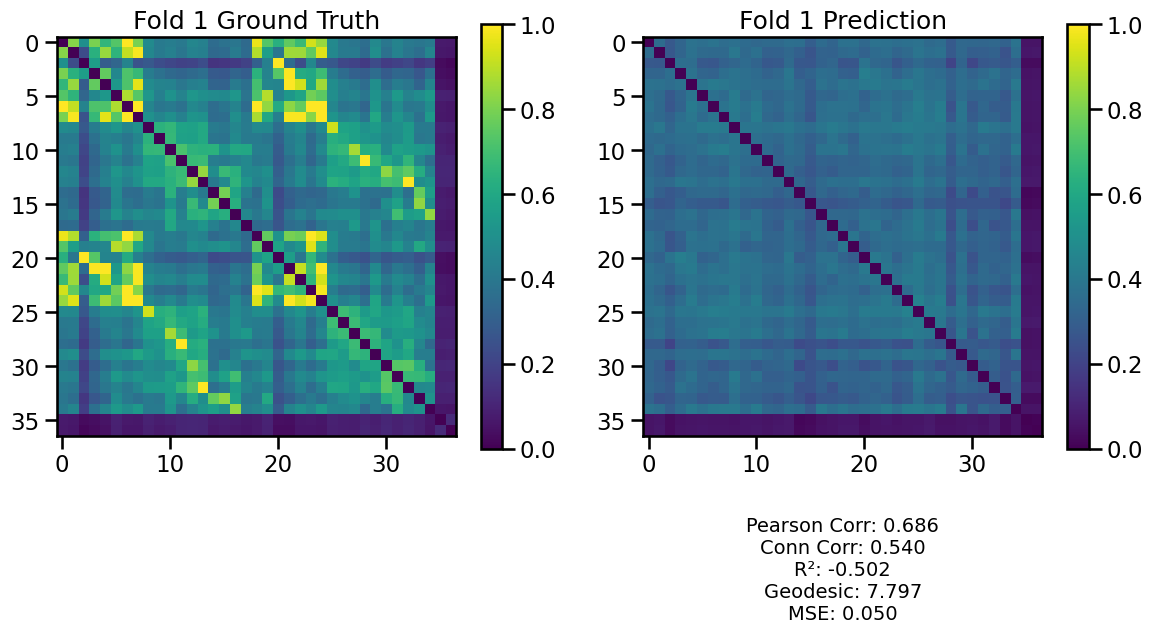

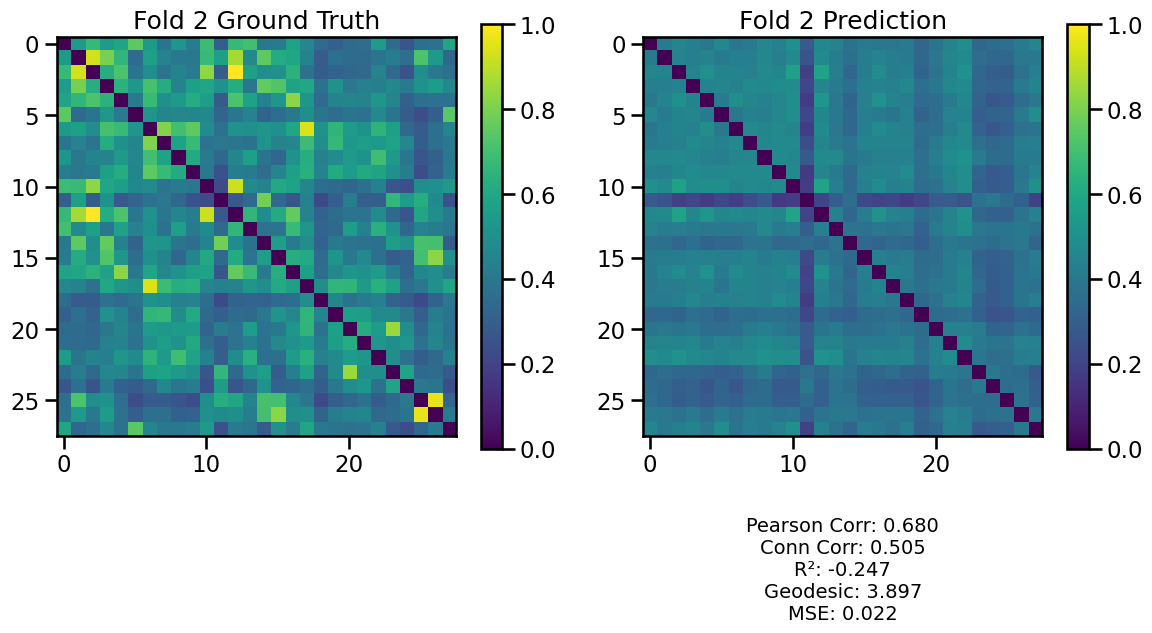

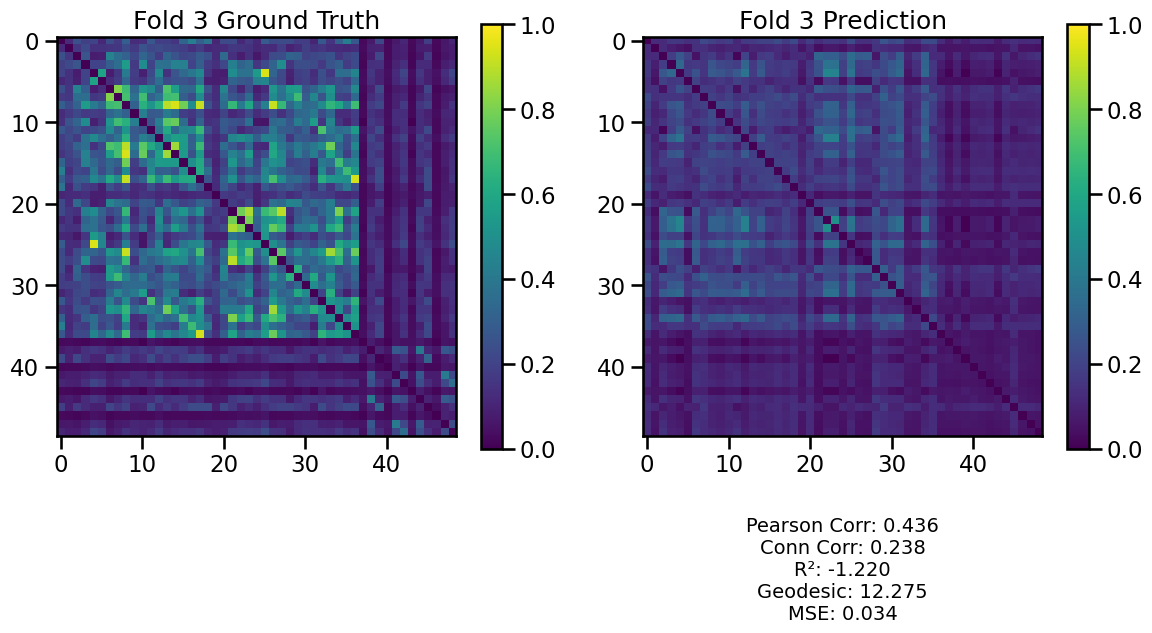

TRANS


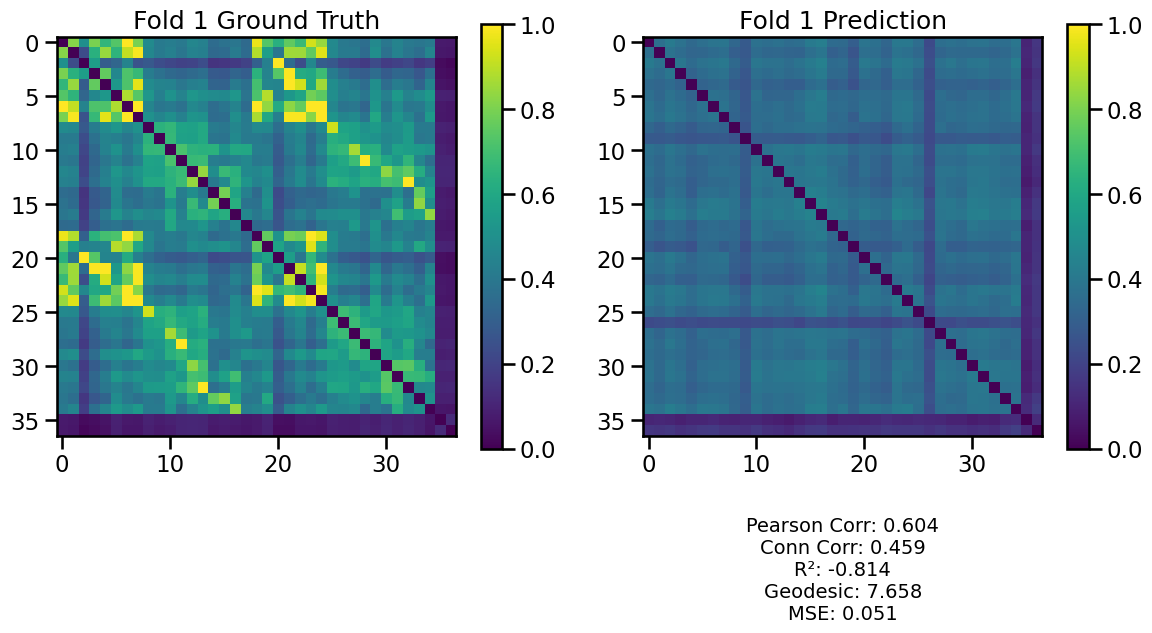

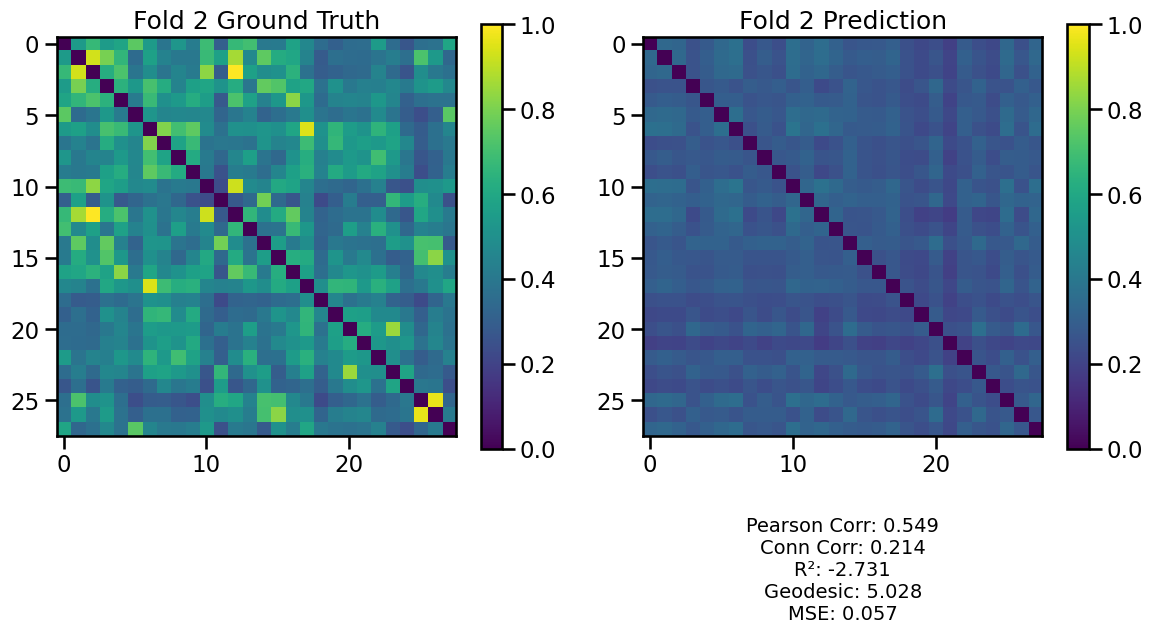

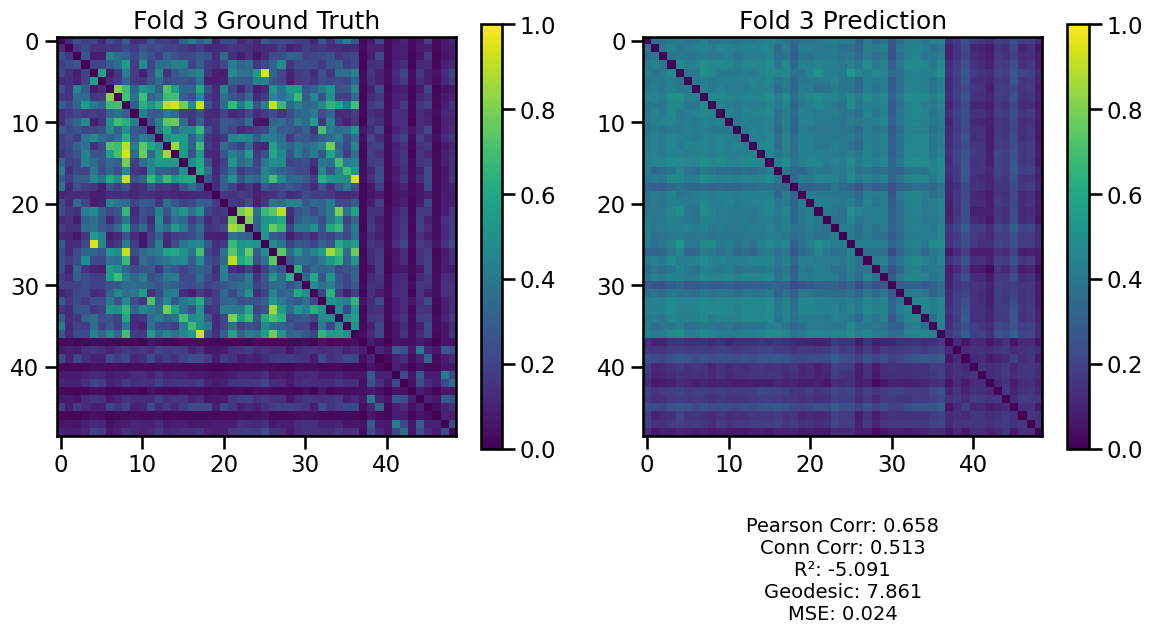

In [34]:
split = '1.01_3'
print('CONN')
plot.plot_single_model_predictions_with_metrics(conn_loaded_results[split])
print('TRANS')
plot.plot_single_model_predictions_with_metrics(trans_loaded_results[split])

CONN


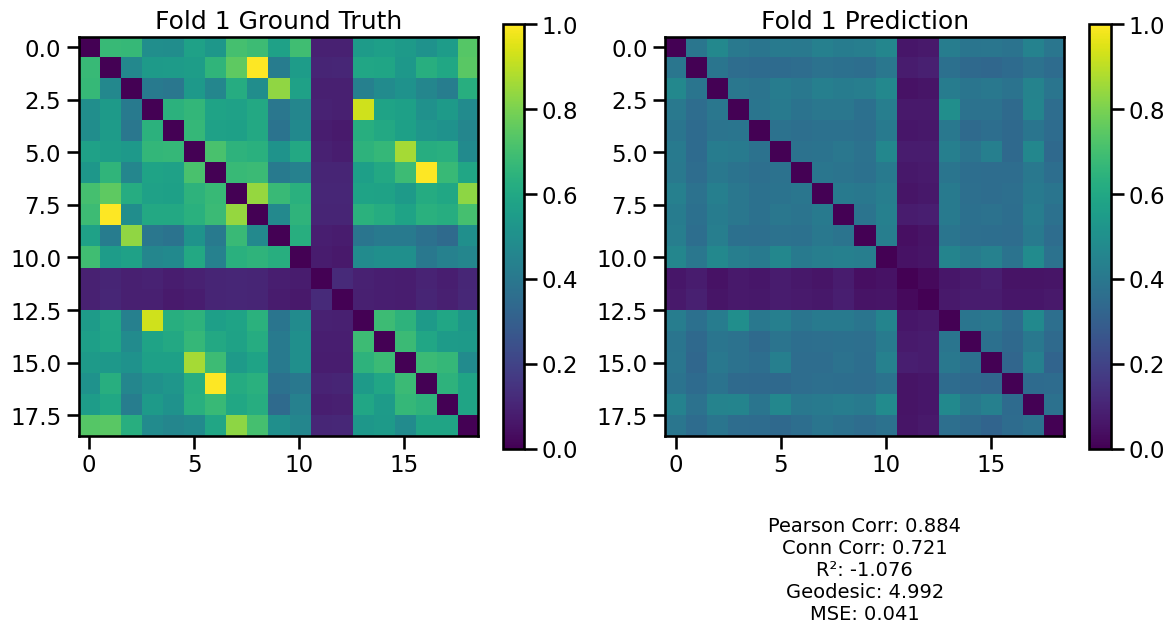

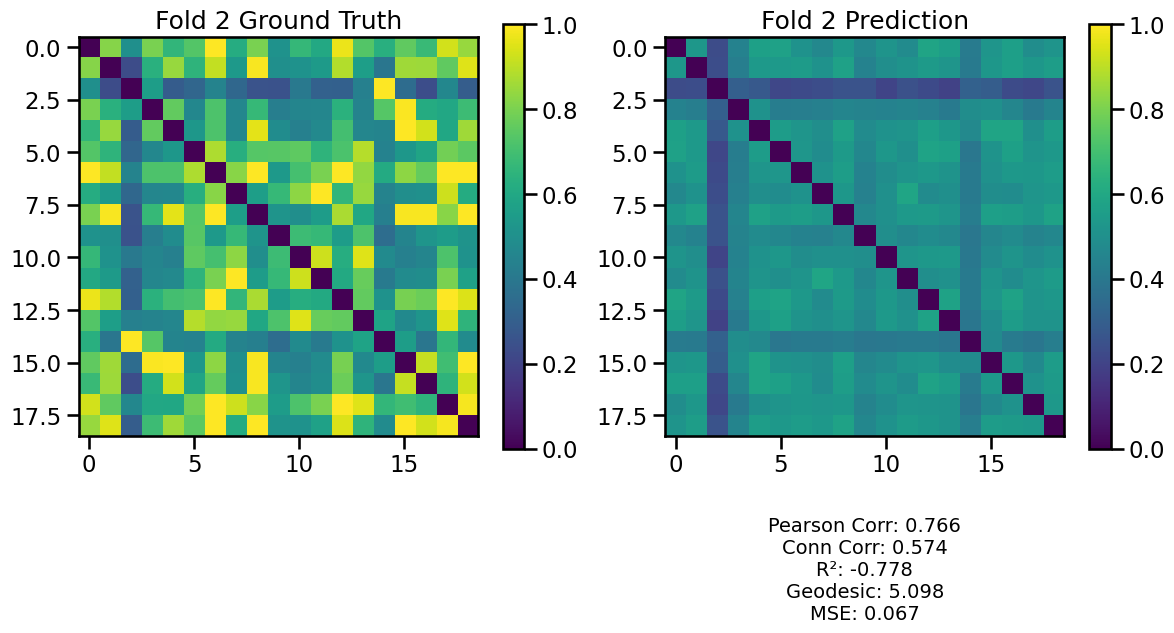

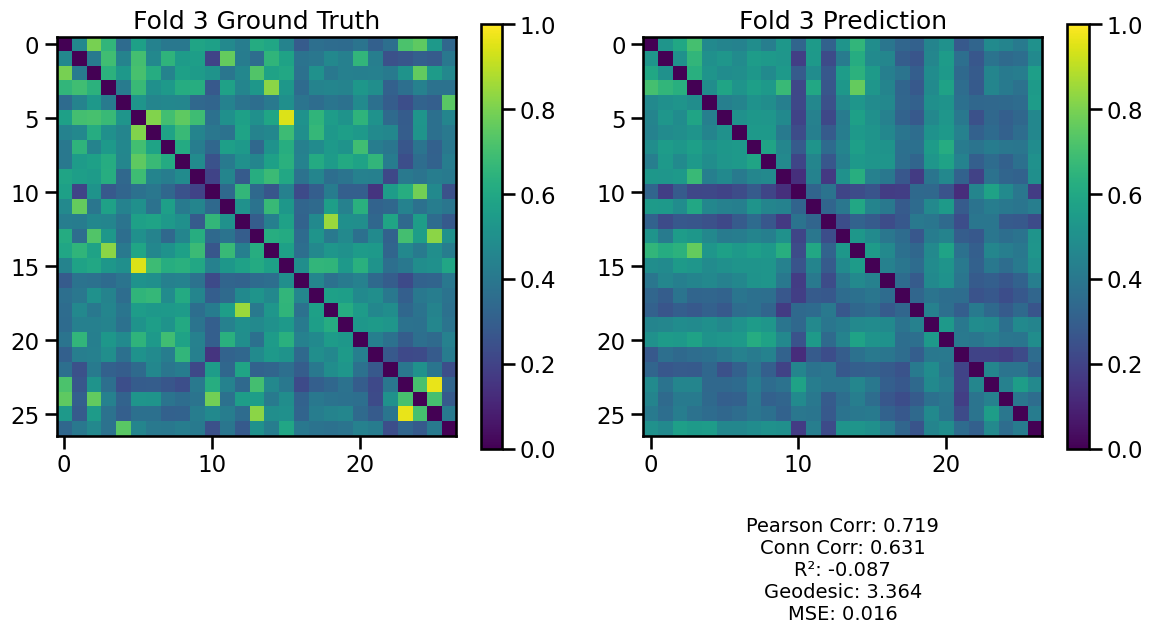

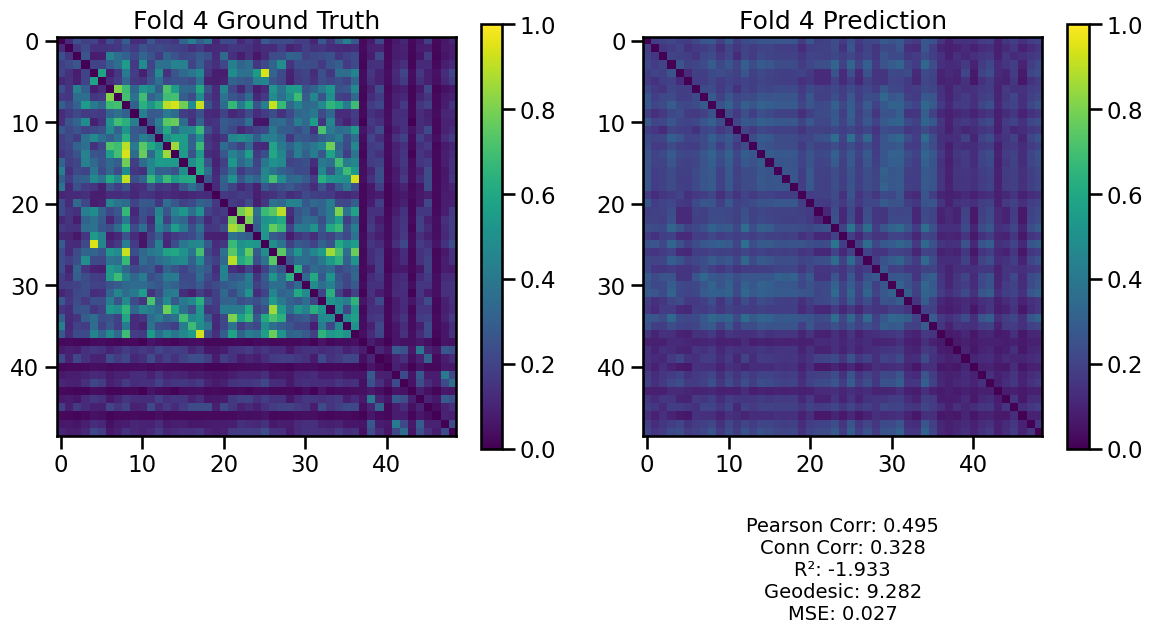

TRANS


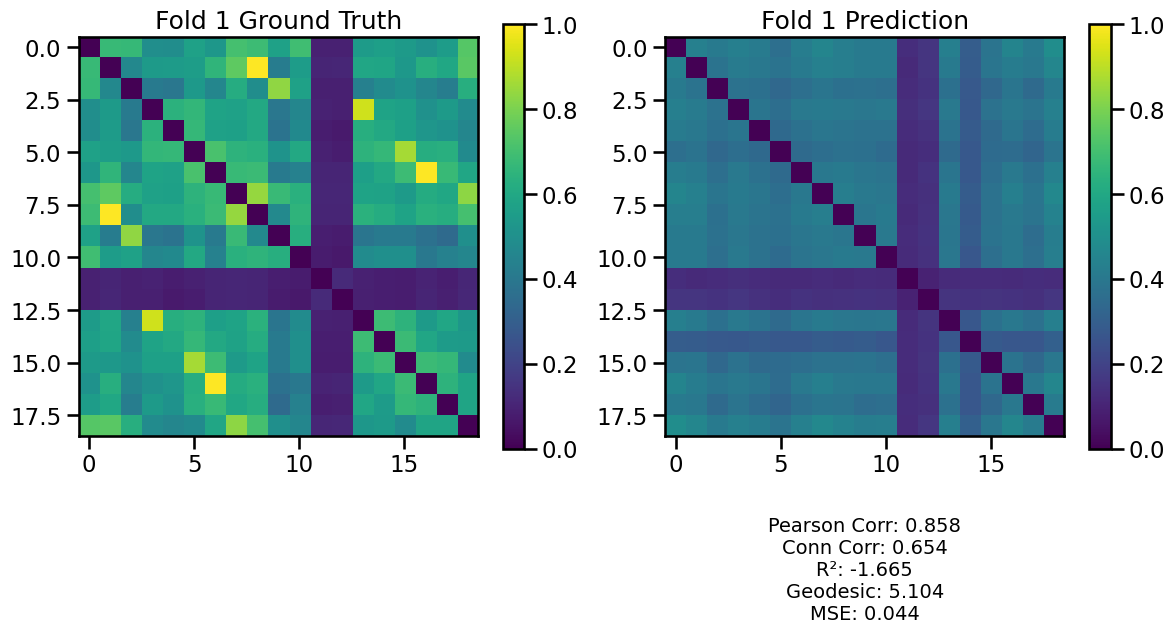

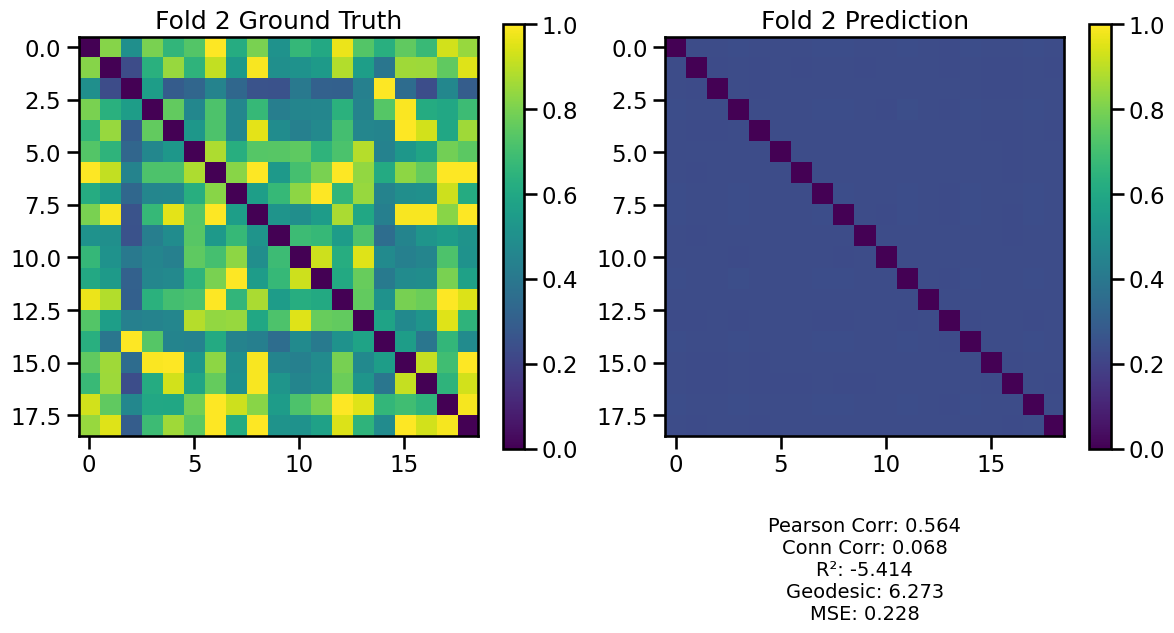

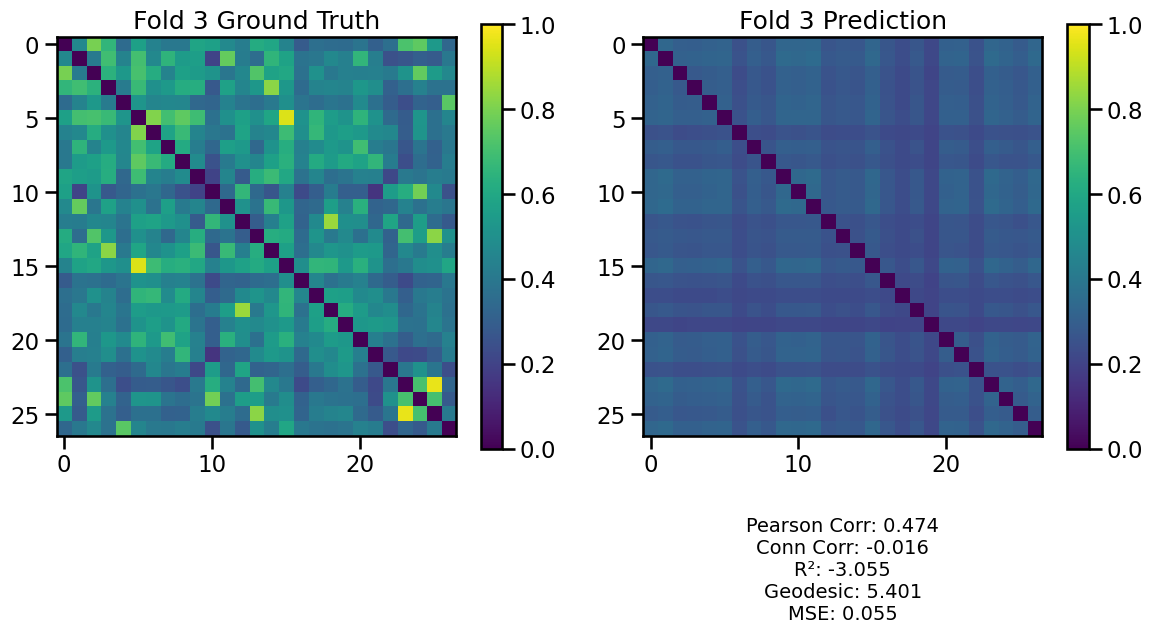

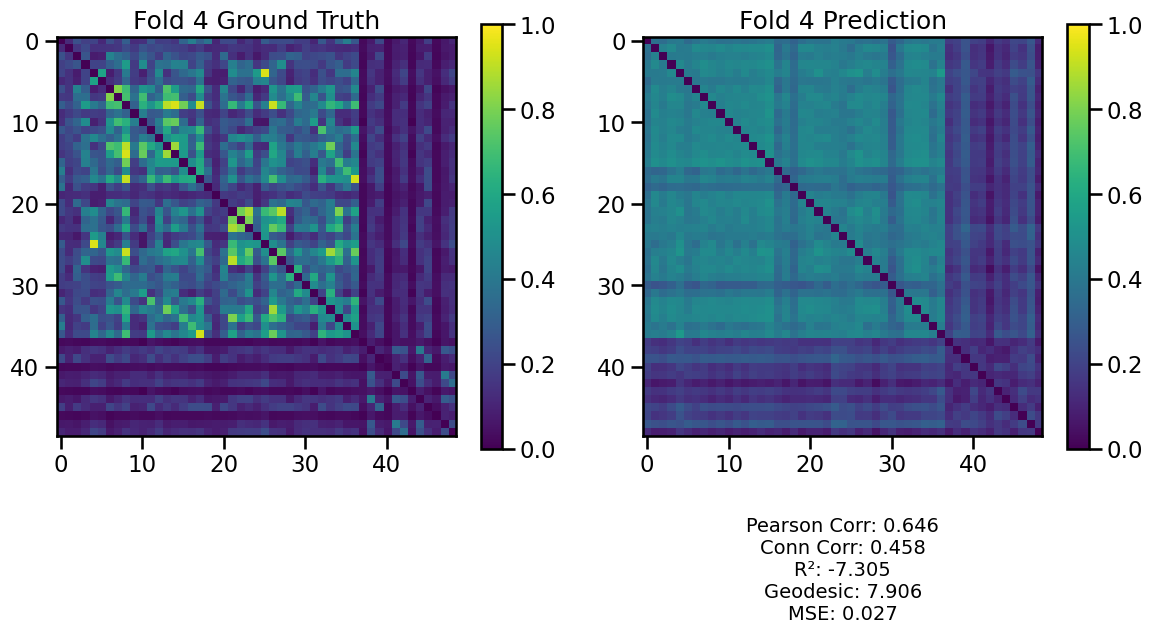

In [35]:
split = '1.02_1'
print('CONN')
plot.plot_single_model_predictions_with_metrics(conn_loaded_results[split])
print('TRANS')
plot.plot_single_model_predictions_with_metrics(trans_loaded_results[split])